# drive mount

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import

In [67]:
import time, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from datetime import datetime, timedelta

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [125]:
pd.options.display.float_format = '{:.5f}'.format

In [126]:
df_lg = pd.read_excel("/content/drive/MyDrive/유비온 프로젝트1/datasets/freq_df_LG.xlsx", index_col=0)

In [127]:
df_oil = pd.read_excel("/content/drive/MyDrive/유비온 프로젝트1/datasets/oil_freq_df.xlsx", index_col=0)

In [128]:
df_lg.head(2)

,엘지타겟,외국인,국내,증시,코스피,시장,가장,종목,성전,증권,...,직지,공구,전라북도,새만금개발청,군산시,파우스트,절강,재외,담수,역삼투막
1,0,0.00000,0.00000,0.00000,0.06711,0.13937,0.26042,0.21390,0.39683,0.06309,...,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,1,0.29806,0.00000,0.00000,0.06711,0.06969,0.00000,0.10695,0.39683,0.06309,...,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [129]:
df_oil.head(2)

,대한타겟,엘지타겟,기록,축산물,가격,국제,유가,계속,주거,비용,...,이륜차,파산,경제의회,우즈,가액,취업,실리콘밸리,펑크,디폴트,매카시
0,0,0,0.41152,0.00000,0.05819,0.07257,0.00000,0.40161,0.00000,0.00000,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0,1,0.00000,0.00000,0.26186,0.07257,0.11672,0.00000,0.00000,0.00000,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [130]:
target = df_lg["엘지타겟"]
df_lg = df_lg.drop("엘지타겟", axis=1)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df_lg, target, test_size = 0.2, random_state = 1, stratify = target)

In [132]:
x_train_expanded = tf.expand_dims(X_train, axis=2)
x_test_expanded = tf.expand_dims(X_test, axis=2)

In [133]:
X_train.shape

(386, 3848)

In [134]:
x_train_expanded.shape

TensorShape([386, 3848, 1])

## 교수님 코드

In [135]:
model = tf.keras.Sequential([
    layers.LSTM(100, return_sequences=True, input_shape=(x_train_expanded.shape[1], x_train_expanded.shape[2])),
    layers.Dropout(0.2),
    # layers.Dropout(0.25),
    # layers.Dropout(0.4),
    # layers.Dropout(0.5),
    layers.Bidirectional(layers.LSTM(100)),
    layers.Dropout(0.2),
    # layers.Dropout(0.25),
    # layers.Dropout(0.4),
    # layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

history = model.fit(x_train_expanded, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_train_expanded, y_train),
                    shuffle=True)

model.summary()

Epoch 1/30
4/4 [==============================] - 8s 979ms/step - loss: 0.6923 - val_loss: 0.6884
Epoch 2/30
4/4 [==============================] - 3s 697ms/step - loss: 0.6880 - val_loss: 0.6843
Epoch 3/30
4/4 [==============================] - 3s 692ms/step - loss: 0.6853 - val_loss: 0.6821
Epoch 4/30
4/4 [==============================] - 3s 694ms/step - loss: 0.6826 - val_loss: 0.6813
Epoch 5/30
4/4 [==============================] - 3s 696ms/step - loss: 0.6813 - val_loss: 0.6803
Epoch 6/30
4/4 [==============================] - 3s 698ms/step - loss: 0.6800 - val_loss: 0.6800
Epoch 7/30
4/4 [==============================] - 3s 701ms/step - loss: 0.6803 - val_loss: 0.6818
Epoch 8/30
4/4 [==============================] - 3s 697ms/step - loss: 0.6822 - val_loss: 0.6837
Epoch 9/30
4/4 [==============================] - 3s 703ms/step - loss: 0.6838 - val_loss: 0.6830
Epoch 10/30
4/4 [==============================] - 3s 707ms/step - loss: 0.6826 - val_loss: 0.6811
Epoch 11/30
4/4 [==

In [136]:
model.save("/content/drive/MyDrive/유비온 프로젝트1/LSTM_word_freq_model_LG.h5")

In [137]:
target = df_oil["엘지타겟"]
df_oil = df_oil.drop(["대한타겟", "엘지타겟"], axis=1)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(df_oil, target, test_size = 0.2, random_state = 1, stratify = target)

x_train_expanded = tf.expand_dims(X_train, axis=2)
x_test_expanded = tf.expand_dims(X_test, axis=2)

In [139]:
max_length = 3848  # 이전 학습 데이터셋의 최대 시퀀스 길이
x_train_expanded_padded = pad_sequences(x_train_expanded, maxlen=max_length, padding='post')

pretrained_model = load_model('/content/drive/MyDrive/유비온 프로젝트1/LSTM_word_freq_model_LG.h5')

for layer in pretrained_model.layers:
    layer.trainable = False

output_layer = layers.Dense(1, activation='sigmoid')(pretrained_model.layers[-2].output)

transfer_model = tf.keras.Model(inputs=pretrained_model.input, outputs=output_layer)

transfer_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

history_transfer = transfer_model.fit(x_train_expanded_padded, y_train,
                   epochs=30,
                   batch_size=128,
                   validation_data=(x_train_expanded_padded, y_train),
                   shuffle=True)

Epoch 1/30
4/4 [==============================] - 6s 721ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 2/30
4/4 [==============================] - 2s 436ms/step - loss: 0.6932 - val_loss: 0.6927
Epoch 3/30
4/4 [==============================] - 2s 432ms/step - loss: 0.6925 - val_loss: 0.6926
Epoch 4/30
4/4 [==============================] - 1s 427ms/step - loss: 0.6924 - val_loss: 0.6925
Epoch 5/30
4/4 [==============================] - 2s 430ms/step - loss: 0.6925 - val_loss: 0.6923
Epoch 6/30
4/4 [==============================] - 2s 427ms/step - loss: 0.6922 - val_loss: 0.6922
Epoch 7/30
4/4 [==============================] - 2s 428ms/step - loss: 0.6925 - val_loss: 0.6920
Epoch 8/30
4/4 [==============================] - 2s 430ms/step - loss: 0.6923 - val_loss: 0.6919
Epoch 9/30
4/4 [==============================] - 2s 432ms/step - loss: 0.6918 - val_loss: 0.6918
Epoch 10/30
4/4 [==============================] - 2s 437ms/step - loss: 0.6918 - val_loss: 0.6918
Epoch 11/30
4/4 [==

In [140]:
max_length = 3848  # 이전 학습 데이터셋의 최대 시퀀스 길이
x_test_expanded_padded = pad_sequences(x_test_expanded, maxlen=max_length, padding='post')

In [141]:
# 전이학습 후 예측확률값
pred_proba_transfer = transfer_model.predict(x_test_expanded_padded)

4/4 [==============================] - 1s 123ms/step


In [142]:
pred_proba_transfer_1d = pred_proba_transfer.reshape(-1)

In [143]:
pred_proba_transfer_1d

array([0.4764209 , 0.47802123, 0.47794905, 0.4771508 , 0.47641328,
       0.47650757, 0.4780627 , 0.4765632 , 0.4765646 , 0.47658926,
       0.4923373 , 0.4761221 , 0.4796694 , 0.48276302, 0.47603744,
       0.4761316 , 0.47656313, 0.47707066, 0.47638154, 0.47656313,
       0.47656313, 0.47657406, 0.49405104, 0.47656313, 0.47656313,
       0.47649398, 0.47611752, 0.47655788, 0.47931692, 0.47656313,
       0.47649398, 0.47703683, 0.47656313, 0.47656313, 0.4879493 ,
       0.47656426, 0.4771374 , 0.47656453, 0.47656313, 0.476565  ,
       0.47656313, 0.4765647 , 0.47639927, 0.4765805 , 0.47656313,
       0.4910523 , 0.47665882, 0.47653633, 0.47656724, 0.4799791 ,
       0.48301893, 0.476565  , 0.4795528 , 0.47656313, 0.47820842,
       0.4784214 , 0.4762269 , 0.47967115, 0.4800848 , 0.47649616,
       0.4765777 , 0.476968  , 0.47656313, 0.5281102 , 0.4765673 ,
       0.47971162, 0.47651574, 0.47664875, 0.47656637, 0.4765647 ,
       0.47656313, 0.47656313, 0.4765632 , 0.47656313, 0.48097

In [187]:
# 임계치 이상이면 True 미만이면 False를 부여한다.
threshold = 0.4781
preds = (pred_proba_transfer_1d >= threshold)

In [203]:
# Compute the metrics
accuracy_= accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy_:.3f}')
#=> Accuracy: 0.988

precision_=precision_score(y_test, preds)
print(f'Precision = {round(precision_,3)}')
#=> Precision = 0.99

recall_=recall_score(y_test, preds)
print(f'Recall = {round(recall_,3)}')
#=> Recall = 0.99

f1_=f1_score(y_test, preds)
print(f'F1 = {round(f1_,3)}')
#=> Recall = 0.99

Accuracy: 0.567
Precision = 0.545
Recall = 0.273
F1 = 0.364


In [146]:
transfer_model.save("/content/drive/MyDrive/유비온 프로젝트1/LG전이학습_완료모델.h5")

## 과적합 여부 확인1
> 훈련손실, 검증손실 추이 비교

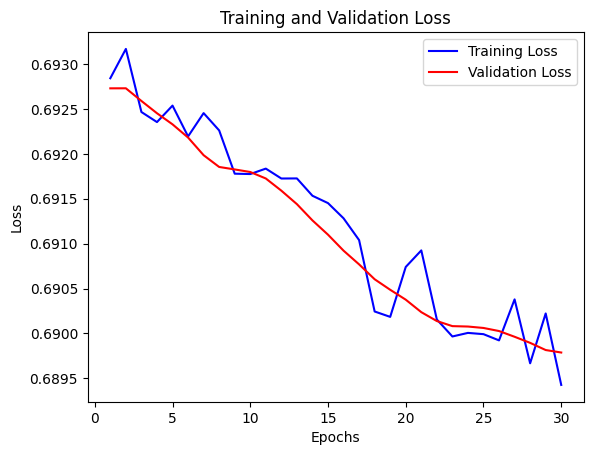

In [147]:
# 훈련 손실과 검증 손실 추이 가져오기
train_loss = history_transfer.history['loss']
val_loss = history_transfer.history['val_loss']

# 손실 추이 그래프 그리기
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [218]:
df_test_lg = pd.read_excel("/content/drive/MyDrive/유비온 프로젝트1/datasets/df_lg_freq_6.xlsx", index_col=0)

In [219]:
df_test_oil = pd.read_excel("/content/drive/MyDrive/유비온 프로젝트1/datasets/df_oil_freq_6.xlsx", index_col=0)

In [220]:
label = df_test_lg["엘지타겟"]

In [221]:
df_test_lg = df_test_lg.drop("엘지타겟",axis=1)

In [222]:
df_test_lg.shape

(30, 137)

In [223]:
df_test_oil = df_test_oil.drop("엘지타겟",axis=1)

In [224]:
df_test_oil.shape

(30, 127)

In [225]:
pretrained_model = load_model('/content/drive/MyDrive/유비온 프로젝트1/LG전이학습_완료모델.h5')

In [226]:
df_test_lg_expanded = tf.expand_dims(df_test_lg, axis=2)
df_test_oil_expanded = tf.expand_dims(df_test_oil, axis=2)

In [227]:
max_length = 3848  # 이전 학습 데이터셋의 최대 시퀀스 길이
df_test_lg_expanded_padded = pad_sequences(df_test_lg_expanded, maxlen=max_length, padding='post')
df_test_oil_expanded_padded = pad_sequences(df_test_oil_expanded, maxlen=max_length, padding='post')

In [228]:
pred_proba_test = pretrained_model.predict(df_test_lg_expanded_padded)
pred_proba_oil_test = pretrained_model.predict(df_test_oil_expanded_padded)

1/1 [==============================] - 0s 152ms/step


In [229]:
pred_proba_test_1d = pred_proba_test.reshape(-1)
pred_proba_oil_test_1d = pred_proba_oil_test.reshape(-1)

In [230]:
# 임계치 이상이면 True 미만이면 False를 부여한다.
threshold = 0.4781
preds_test = (pred_proba_test_1d >= threshold)
preds_oil_test = (pred_proba_oil_test_1d >= threshold)

In [231]:
# Compute the metrics
accuracy_= accuracy_score(label, preds_test)
print(f'Accuracy: {accuracy_:.3f}')
#=> Accuracy: 0.988

precision_=precision_score(label, preds_test)
print(f'Precision = {round(precision_,3)}')
#=> Precision = 0.99

recall_=recall_score(label, preds_test)
print(f'Recall = {round(recall_,3)}')
#=> Recall = 0.99

f1_=f1_score(label, preds_test)
print(f'F1 = {round(f1_,3)}')
#=> Recall = 0.99

Accuracy: 0.467
Precision = 0.5
Recall = 0.875
F1 = 0.636


In [232]:
# Compute the metrics
accuracy_= accuracy_score(label, preds_oil_test)
print(f'Accuracy: {accuracy_:.3f}')
#=> Accuracy: 0.988

precision_=precision_score(label, preds_oil_test)
print(f'Precision = {round(precision_,3)}')
#=> Precision = 0.99

recall_=recall_score(label, preds_oil_test)
print(f'Recall = {round(recall_,3)}')
#=> Recall = 0.99

f1_=f1_score(label, preds_oil_test)
print(f'F1 = {round(f1_,3)}')
#=> Recall = 0.99

Accuracy: 0.467
Precision = 0.5
Recall = 0.812
F1 = 0.619
